In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('wpbc.data')
data.head()

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [9]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [7]:
X.shape

(699, 9)

In [4]:
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [8]:
X['Clump_thickness'].mean()

4.417739628040057

In [10]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [11]:
y.describe

<bound method NDFrame.describe of      Class
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]>

In [12]:
y.info

<bound method DataFrame.info of      Class
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]>

In [17]:
y.shape

(699, 1)

In [21]:
df = X.copy()
df['Class'] = y
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [22]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [23]:
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR

Clump_thickness                4.0
Uniformity_of_cell_size        4.0
Uniformity_of_cell_shape       4.0
Marginal_adhesion              3.0
Single_epithelial_cell_size    2.0
Bare_nuclei                    5.0
Bland_chromatin                3.0
Normal_nucleoli                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64

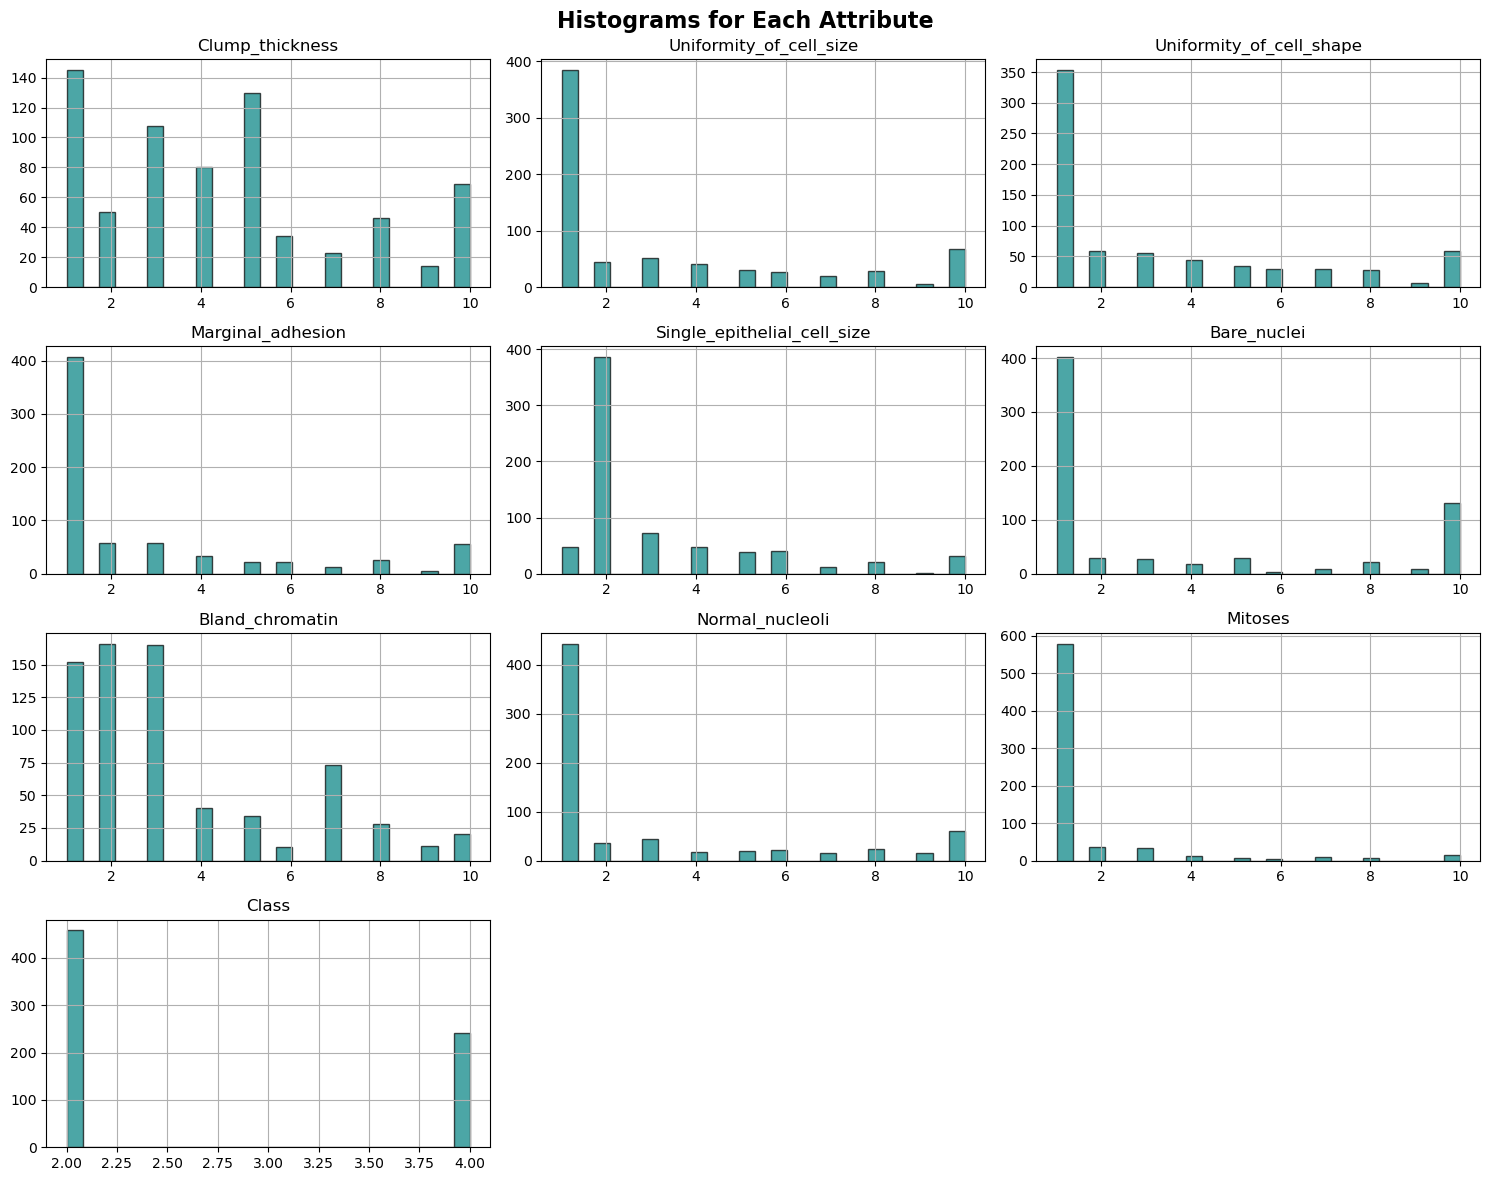

In [27]:
df.hist(figsize=(15, 12), bins=25, color='teal', alpha=0.7, edgecolor='black')
plt.suptitle('Histograms for Each Attribute', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [42]:
df['Class'].unique()

array([2, 4], dtype=int64)

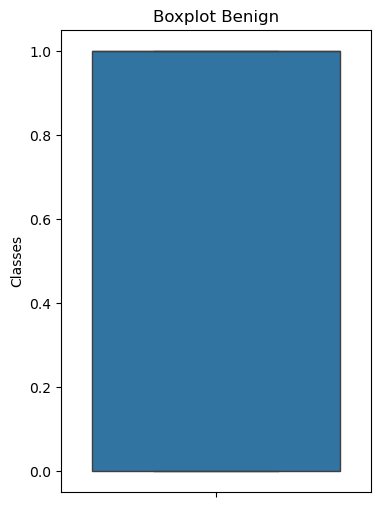

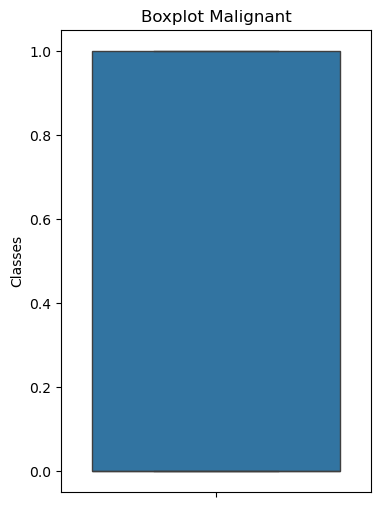

In [56]:
plt.figure(figsize=(4, 6))
sns.boxplot(df['Class']==2)
plt.title('Boxplot Benign')
plt.ylabel('Classes')

plt.figure(figsize=(4, 6))
sns.boxplot(df['Class']==4)
plt.title('Boxplot Malignant')
plt.ylabel('Classes')
plt.show()

plt.show()

In [60]:
df['Class'].describe()

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64

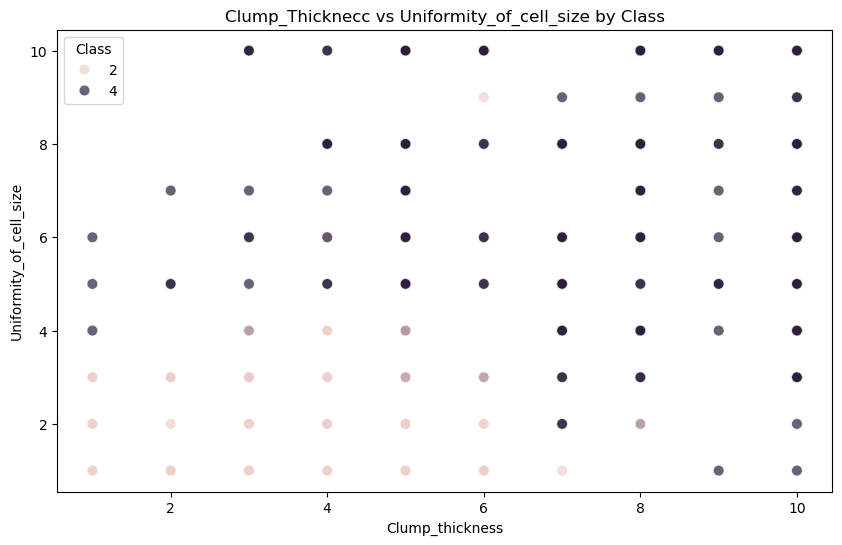

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Clump_thickness', y='Uniformity_of_cell_size', 
                hue='Class', 
                alpha=0.7, s=60)
plt.title('Clump_Thickness vs Uniformity_of_cell_size by Class')
plt.legend(title='Class')
plt.show()

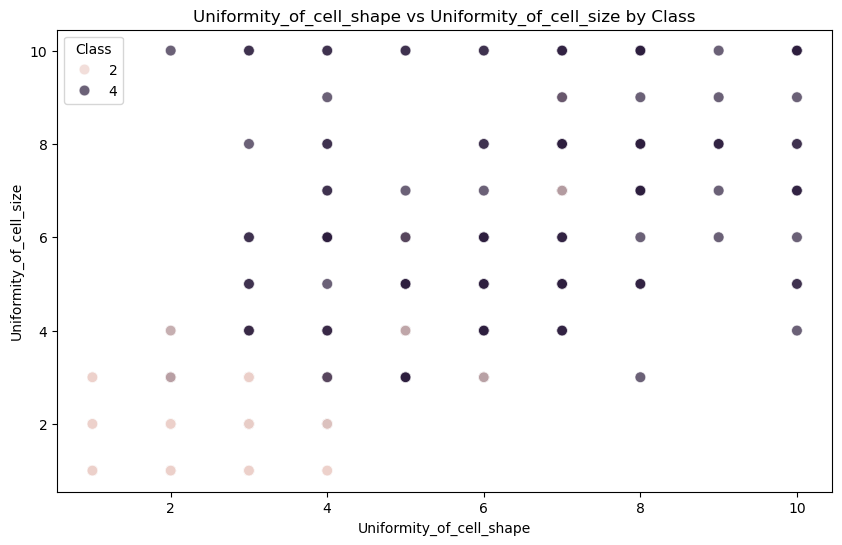

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Uniformity_of_cell_shape', y='Uniformity_of_cell_size', 
                hue='Class', 
                alpha=0.7, s=60)
plt.title('Uniformity_of_cell_shape vs Uniformity_of_cell_size by Class')
plt.legend(title='Class')
plt.show()

In [65]:
#Preprocessing

In [68]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [71]:
df['Bare_nuclei'].describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_nuclei, dtype: float64

In [91]:
df_clean = df['Bare_nuclei'].dropna()

In [98]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
X_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(df['Bare_nuclei'])

SyntaxError: incomplete input (2951585923.py, line 4)

In [93]:
df_clean.isnull().sum()

0

In [100]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("Original range:")
print(X.describe().loc[['min', 'max']])
print("\nAfter Min-Max scaling:")
print(pd.DataFrame(X_normalized, columns=X.columns).describe().loc[['min', 'max']])

Original range:
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
min              1.0                      1.0                       1.0   
max             10.0                     10.0                      10.0   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
min                1.0                          1.0          1.0   
max               10.0                         10.0         10.0   

     Bland_chromatin  Normal_nucleoli  Mitoses  
min              1.0              1.0      1.0  
max             10.0             10.0     10.0  

After Min-Max scaling:
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
min              0.0                      0.0                       0.0   
max              1.0                      1.0                       1.0   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
min                0.0                          0.0          0.0   
max                1

In [99]:
#There are no categprical features